<a href="https://colab.research.google.com/github/aryan790/LSTM_ARIMA/blob/main/lstm_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
#import yfinance as yf

In [3]:
start = '2010-01-01'
end = '2013-01-01'
key='b22423a3a7ac15903f9b12d31ed85da7659a51f6'

In [4]:
df = pdr.get_data_tiingo('AAPL',api_key = key)


<ipython-input-4-e9f9e4a57455>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key = key)


In [5]:
df.to_csv('AAPL.csv')

In [6]:
df = pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-15 00:00:00+00:00,210.24,210.74,208.33,209.22,28807564,50.334787,50.454495,49.877503,50.090583,115230256,0.0,1.0
1,AAPL,2018-08-16 00:00:00+00:00,213.32,213.81,211.47,211.75,28500367,51.072188,51.189502,50.629269,50.696305,114001468,0.0,1.0
2,AAPL,2018-08-17 00:00:00+00:00,217.58,217.95,213.16,213.44,35426997,52.092099,52.180683,51.033881,51.100918,141707988,0.0,1.0
3,AAPL,2018-08-20 00:00:00+00:00,215.46,219.18,215.11,218.10,30287695,51.584538,52.475165,51.500742,52.216596,121150780,0.0,1.0
4,AAPL,2018-08-21 00:00:00+00:00,215.04,217.19,214.03,216.80,26159755,51.483983,51.998727,51.242173,51.905355,104639020,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-08-07 00:00:00+00:00,178.85,183.13,177.35,182.13,97576069,178.608895,182.883125,177.110917,181.884473,97576069,0.00,1.0
1252,AAPL,2023-08-08 00:00:00+00:00,179.80,180.27,177.58,179.69,67823003,179.557614,180.026980,177.340607,179.447762,67823003,0.00,1.0
1253,AAPL,2023-08-09 00:00:00+00:00,178.19,180.93,177.01,180.87,60378492,177.949784,180.686091,176.771375,180.626171,60378492,0.00,1.0
1254,AAPL,2023-08-10 00:00:00+00:00,177.97,180.75,177.60,179.48,54686851,177.730081,180.506333,177.360580,179.238045,54686851,0.00,1.0
1255,AAPL,2023-08-11 00:00:00+00:00,177.79,178.62,176.55,177.32,52036672,177.790000,178.620000,176.550000,177.320000,52036672,0.24,1.0


In [9]:
df1 = df.reset_index()['adjClose']

In [10]:
df1.shape

(1256,)

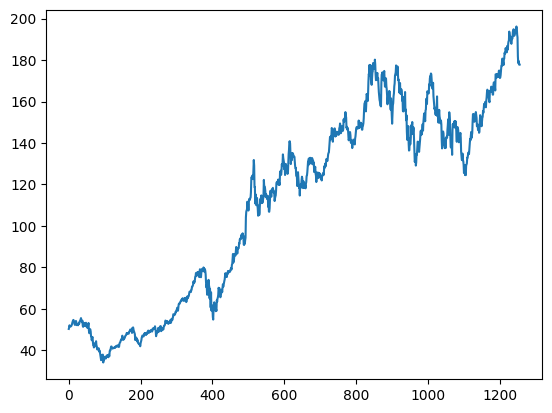

In [11]:
plt.plot(df1)

In [12]:
df1[550]

114.7946579858

In [13]:
'''The code you provided is performing a process called data normalization or
 scaling using the MinMaxScaler from the sklearn.preprocessing module.
  This process is a common preprocessing step in machine learning and time series analysis. Let's break down what's happening and why this operation is performed:

Data Normalization:
Data normalization, also known as feature scaling, is the process of transforming
numerical features to a common scale. This is particularly important when working
with algorithms that are sensitive to the scale of input features. Scaling helps
ensure that no single feature dominates the learning process due to its larger
 magnitude.

MinMaxScaler:
MinMaxScaler is a specific scaler provided by the sklearn.preprocessing module.
It scales the data in such a way that the transformed values are within a specified
 range (usually between 0 and 1). It works as follows:

It calculates the minimum and maximum values of the input data.
It then transforms each data point according to the formula: (x - min) / (max - min).
Reasons for Scaling:
There are a few key reasons for performing data scaling:

Algorithm Sensitivity: Some machine learning algorithms, like gradient descent-based
 optimization methods, are sensitive to the scale of input features. If features have
  very different scales, it can lead to slow convergence or skewed results.

Distance Metrics: Algorithms that use distance metrics (e.g., k-nearest neighbors)
 can be affected by the scale of the features. Scaling helps ensure that features
  with larger scales don't dominate the distances.

Regularization: Regularization techniques (e.g., L1 or L2 regularization) often
 assume that features are on similar scales. Scaling helps in maintaining this assumption.

Neural Networks: Neural networks, including LSTMs and other architectures, tend
 to perform better when input features are within a similar range. It can speed up convergence and lead to better generalization.'''

"The code you provided is performing a process called data normalization or\n scaling using the MinMaxScaler from the sklearn.preprocessing module.\n  This process is a common preprocessing step in machine learning and time series analysis. Let's break down what's happening and why this operation is performed:\n\nData Normalization:\nData normalization, also known as feature scaling, is the process of transforming\nnumerical features to a common scale. This is particularly important when working\nwith algorithms that are sensitive to the scale of input features. Scaling helps\nensure that no single feature dominates the learning process due to its larger\n magnitude.\n\nMinMaxScaler:\nMinMaxScaler is a specific scaler provided by the sklearn.preprocessing module.\nIt scales the data in such a way that the transformed values are within a specified\n range (usually between 0 and 1). It works as follows:\n\nIt calculates the minimum and maximum values of the input data.\nIt then transform

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1

array([[0.09981922],
       [0.10437042],
       [0.11066526],
       ...,
       [0.88745218],
       [0.88609618],
       [0.886466  ]])

In [16]:
#preprocessing the data:

#traing and testing

training_size=int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(816, 440)

In [18]:
train_data

array([[0.09981922],
       [0.10437042],
       [0.11066526],
       [0.10753261],
       [0.106912  ],
       [0.10692677],
       [0.10757694],
       [0.10856698],
       [0.11119722],
       [0.1137979 ],
       [0.11864463],
       [0.12167384],
       [0.12551576],
       [0.12659445],
       [0.12439274],
       [0.11882195],
       [0.11616216],
       [0.1117735 ],
       [0.1199302 ],
       [0.1158223 ],
       [0.12371301],
       [0.11991542],
       [0.11110856],
       [0.11164051],
       [0.11183261],
       [0.11428553],
       [0.11078347],
       [0.11540855],
       [0.11747728],
       [0.11486182],
       [0.12155563],
       [0.12272298],
       [0.12496902],
       [0.1279539 ],
       [0.13207658],
       [0.12604772],
       [0.12058037],
       [0.11981198],
       [0.12439274],
       [0.10886251],
       [0.10604018],
       [0.11735907],
       [0.11034017],
       [0.11741817],
       [0.11599962],
       [0.10836011],
       [0.11322161],
       [0.115

In [19]:
test_data

array([[0.69298245],
       [0.69267694],
       [0.70563065],
       [0.70569175],
       [0.71180199],
       [0.72701649],
       [0.75377935],
       [0.7701548 ],
       [0.77302661],
       [0.7754096 ],
       [0.77864803],
       [0.74730249],
       [0.76826062],
       [0.79917844],
       [0.79594001],
       [0.78976867],
       [0.77803701],
       [0.79930065],
       [0.83510666],
       [0.8589366 ],
       [0.85575927],
       [0.88563835],
       [0.86296936],
       [0.85435392],
       [0.88472182],
       [0.84170572],
       [0.83486225],
       [0.82636901],
       [0.84616619],
       [0.86235833],
       [0.86626889],
       [0.89101536],
       [0.88466071],
       [0.88521064],
       [0.87800055],
       [0.8741511 ],
       [0.90128057],
       [0.88716591],
       [0.85795896],
       [0.84011706],
       [0.8411558 ],
       [0.841278  ],
       [0.8589366 ],
       [0.86168621],
       [0.841278  ],
       [0.84665501],
       [0.82667453],
       [0.804

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train)

[[0.09981922 0.10437042 0.11066526 ... 0.00900081 0.00851148 0.01269307]
 [0.10437042 0.11066526 0.10753261 ... 0.00851148 0.01269307 0.01648913]
 [0.11066526 0.10753261 0.106912   ... 0.01269307 0.01648913 0.01721572]
 ...
 [0.578948   0.58205502 0.59204622 ... 0.69801539 0.70448284 0.71345185]
 [0.58205502 0.59204622 0.5839436  ... 0.70448284 0.71345185 0.71021812]
 [0.59204622 0.5839436  0.59515324 ... 0.71345185 0.71021812 0.71351286]]


In [23]:
print(X_test)

[[0.69298245 0.69267694 0.70563065 ... 0.85742635 0.85559094 0.88085844]
 [0.69267694 0.70563065 0.70569175 ... 0.85559094 0.88085844 0.86017947]
 [0.70563065 0.70569175 0.71180199 ... 0.88085844 0.86017947 0.8404182 ]
 ...
 [0.73081919 0.74842268 0.74319087 ... 0.96745605 0.91087396 0.89152018]
 [0.74842268 0.74319087 0.75796303 ... 0.91087396 0.89152018 0.89737562]
 [0.74319087 0.75796303 0.76953455 ... 0.89152018 0.89737562 0.88745218]]


In [24]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [25]:
#reshape input to be [sample, time stamp,featue] which req. for lstm
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 335ms/step - loss: 0.0634 - val_loss: 0.0270
Epoch 2/100
12/12 [==============================] - 5s 474ms/step - loss: 0.0097 - val_loss: 0.0045
Epoch 3/100
12/12 [==============================] - 5s 397ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 4/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0015 - val_loss: 0.0037
Epoch 5/100
12/12 [==============================] - 3s 245ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 6/100
12/12 [==============================] - 4s 363ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 7/100
12/12 [==============================] - 4s 319ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 8/100
12/12 [==============================] - 3s 285ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 9/100
12/12 [==============================] - 5s 408ms/step - loss: 0.0010 - val_loss: 0.0029
Epoch 10/100
12/12 [==============================] - 3s 283ms/step - loss: 0.0010 - val_l

In [30]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 42ms/step


In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

99.34746978804671

In [34]:

### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

158.0272773299406

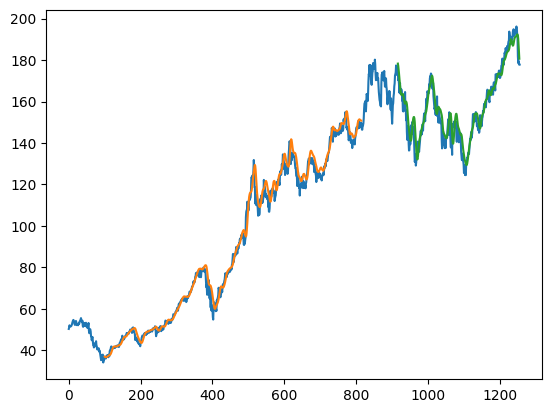

In [35]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


x_input=test_data[341:].reshape(1,-1)
x_input.shape

In [38]:
x_input=test_data[341:].reshape(1,-1)



In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.760609708755775,
 0.7673802816773774,
 0.775504969184041,
 0.7633794885871994,
 0.7595017968233289,
 0.7787056036563067,
 0.7884921590613312,
 0.8041260274443556,
 0.8119429616364848,
 0.8086192258385287,
 0.7971092518707557,
 0.8026488115342214,
 0.7864609871846653,
 0.7788902556451507,
 0.7745817092398213,
 0.8081883711976874,
 0.8060340979953313,
 0.8061571993210215,
 0.8137894815243067,
 0.820929358423597,
 0.8148973934567532,
 0.8048646353997311,
 0.8067727059507068,
 0.7971708025339093,
 0.7971092518707557,
 0.8257303101316873,
 0.8335472443231993,
 0.8329932883572848,
 0.8265304687495996,
 0.8198214464911509,
 0.809604036445285,
 0.857490452201731,
 0.8570595975615067,
 0.8464113328747993,
 0.8573981262076178,
 0.8585983641341774,
 0.8528126018193312,
 0.8497307886245951,
 0.8497307886245951,
 0.8535522369859936,
 0.868098395265543,
 0.8687763941678541,
 0.8628593128339361,
 0.8465873391661247,
 0.848313154555004,
 0.8554013249029588,
 0.8704405732929992,
 0.8819665546415467,

In [48]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps-1,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.87272286]
100
[0.87272286]
101
2 day input [0.76738028 0.77550497 0.76337949 0.7595018  0.7787056  0.78849216
 0.80412603 0.81194296 0.80861923 0.79710925 0.80264881 0.78646099
 0.77889026 0.77458171 0.80818837 0.8060341  0.8061572  0.81378948
 0.82092936 0.81489739 0.80486464 0.80677271 0.7971708  0.79710925
 0.82573031 0.83354724 0.83299329 0.82653047 0.81982145 0.80960404
 0.85749045 0.8570596  0.84641133 0.85739813 0.85859836 0.8528126
 0.84973079 0.84973079 0.85355224 0.8680984  0.86877639 0.86285931
 0.84658734 0.84831315 0.85540132 0.87044057 0.88196655 0.88165837
 0.89916307 0.90446379 0.89601962 0.89373908 0.88517164 0.90212161
 0.90452543 0.92196849 0.91900995 0.92295467 0.93565174 0.92893339
 0.92948811 0.92301631 0.94175373 0.93978137 0.93109066 0.94828717
 0.95562189 0.95771752 0.98471421 0.97540713 0.96844223 0.97140077
 0.96443588 0.95167717 0.94841045 0.95882698 0.96357297 0.96449751
 0.98483748 0.98323494 0.9916791  0.97953676 0.97220204 0.97719458
 0.98255694 0.987

In [ ]:
'''Setting Things Up:

You're creating an empty list called lst_output to store the predicted stock prices.
n_steps is set to 100, which means you're looking at a sequence of 100 previous days' stock prices.
You're initializing an index i to keep track of the number of predictions you want to make (30 days in this case).
Predicting the Next Day's Price:

You start a loop that runs as long as i is less than 30 (for the next 30 days).
Inside the loop, you check if you have enough data (more than 100 days' worth) to make a prediction for the next day's price.
Making Predictions:

If you have more than 100 days' worth of data:
You prepare the data for prediction. You remove the oldest day's data from your data set (temp_input) and create a new input for your model.
You use your trained model to predict the next day's stock price based on this new input.
The predicted price (yhat) is added to your temporary data (temp_input), and you remove the oldest value from temp_input to keep it at 100 days.
The predicted price is also added to lst_output to keep track of all the predictions.
If you don't have enough data (less than 100 days' worth):
You simply predict the next day's stock price based on the available data.
The predicted price is added to both temp_input and lst_output.
Looping and Predicting:

The loop continues, making predictions for the next day's stock price and extending your data (temp_input) until you have 30 predictions.
Print and Show Predictions:

After the loop finishes, you print out all the predicted stock prices in the lst_output list. These are your predictions for the next 30 days.'''


In [ ]:
'''These lines import necessary classes from the TensorFlow library. Specifically:

Sequential: This is a class that allows you to create a sequential stack of layers for your neural network.
Dense: This represents a fully connected layer in a neural network, where each neuron is connected to all the neurons in the previous layer.
LSTM: This is a type of recurrent neural network layer known as Long Short-Term Memory. It's specialized for processing sequences of data.
python
Copy code
model = Sequential()
Here, you create a Sequential model. This model will allow you to stack layers on top of each other in a sequential manner, forming the architecture of your neural network.

python
Copy code
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(): This method is used to add layers to the model.
LSTM(50, return_sequences=True, input_shape=(100, 1)): Here, you're adding an LSTM layer with the following specifications:
50 units (neurons): This LSTM layer will have 50 neurons.
return_sequences=True: This means the layer will return sequences as outputs for each time step.
input_shape=(100, 1): This specifies the shape of the input data. It tells the model that you'll be feeding sequences with 100 time steps and 1 feature at each time step.
python
Copy code
model.add(LSTM(50, return_sequences=True))
Here, you're adding another LSTM layer with similar specifications:

50 units.
return_sequences=True: This means the layer will also return sequences as outputs for each time step. This creates a sequence-to-sequence architecture, where the output sequence from this layer will become the input sequence for the next layer.
python

model.add(LSTM(50))
This line adds the third LSTM layer:

50 units.
This layer, however, doesn't have return_sequences=True. So, it will only return the final output for the whole sequence, not a sequence for each time step. This is typically used when you want to condense the sequence information and prepare it for the final prediction.
python
Copy code
model.add(Dense(1))
Now, you're adding a Dense layer with 1 unit:

This layer is a regular neural network layer that will take the output from the previous LSTM layers and try to predict a single value.
python
Copy code
model.compile(loss='mean_squared_error', optimizer='adam')
Here, you're compiling the model before training it. You're specifying the loss function and optimizer for training:

loss='mean_squared_error': This is the mean squared error loss, which measures the difference between predicted values and actual target values. The goal during training is to minimize this loss.
optimizer='adam': This is the Adam optimizer, which is an optimization algorithm that adjusts the model's parameters to minimize the loss during training.'''

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [50]:
import matplotlib.pyplot as plt
len(df1)


1256

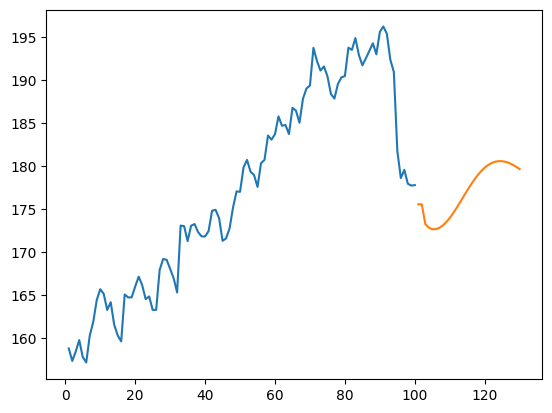

In [52]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

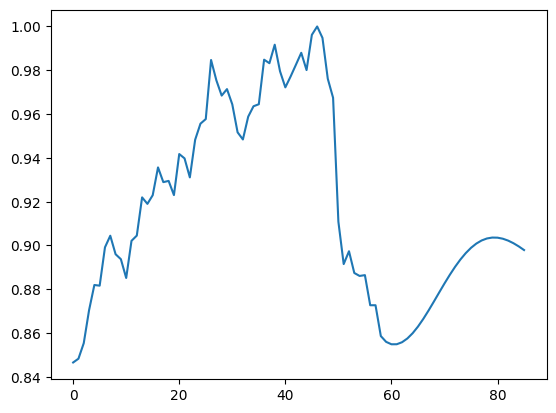

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

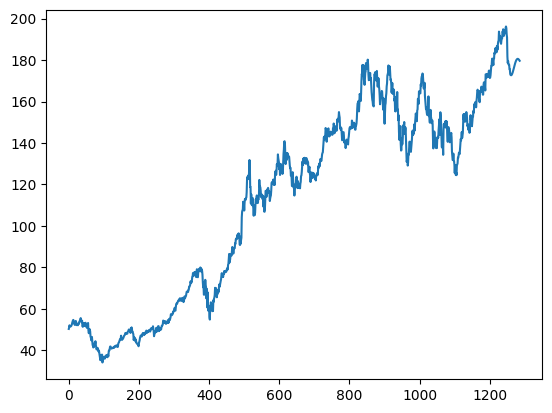

In [54]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)